### Homework 10

이번 과제에서는 고빈도 데이터 및 시장미시구조론을 기반으로 하는 모형에 대해 실습해 보도록 한다

#### 1. Data Import

Notion Database내의 `005930.txt`는 2017-04-24 ~ 2019-05-15동안의 삼성전자 1분 단위의 거래 정보를 기록한 것이다. 아래의 library를 이용해 데이터를 가져오라

In [1]:
import pandas as pd
import numpy as np

In [8]:
stock = pd.read_csv('005930.txt', index_col = 0)
stock.index = pd.to_datetime(stock.index)
stock.head(10)

,open,high,low,close,volume,sell,buy,kospi
date,,,,,,,,
2017-04-24 09:02:00,41200,41200,41180,41200,41700,12700.0,29000.0,2176.090088
2017-04-24 09:03:00,41200,41220,41180,41200,21750,5250.0,16500.0,2176.260010
2017-04-24 09:04:00,41200,41220,41200,41200,25450,6900.0,18550.0,2176.260010
2017-04-24 09:05:00,41200,41200,41140,41140,15350,7850.0,7500.0,2175.459961
2017-04-24 09:06:00,41140,41180,41140,41160,16450,6100.0,10350.0,2174.350098
2017-04-24 09:07:00,41140,41160,41080,41100,15750,12750.0,3000.0,2173.010010
2017-04-24 09:08:00,41080,41100,41040,41060,26000,21700.0,4300.0,2172.040039
2017-04-24 09:09:00,41080,41100,41040,41100,32050,7200.0,24850.0,2174.149902
2017-04-24 09:10:00,41100,41120,41080,41120,9000,450.0,8550.0,2174.810059


Text(0.5, 1.0, 'Samsung Electronics Stock Data')

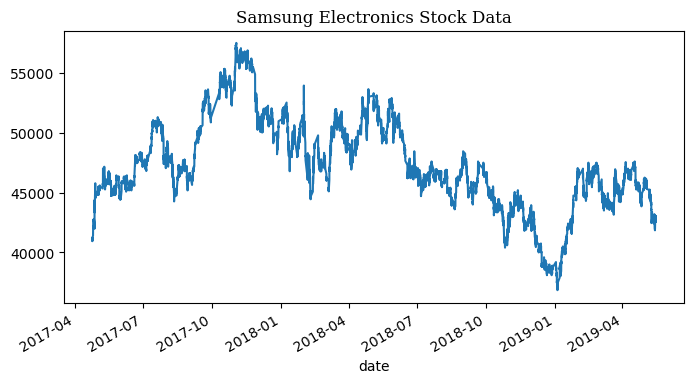

In [9]:
import matplotlib.pyplot as plt

stock.close.plot(figsize = (8, 4), grid = False)
plt.title("Samsung Electronics Stock Data", fontsize = 12, fontfamily = 'Serif')

#### 2. Tick Rule

close series에 대해 Tick Rule을 적용해 보자. 하락과 상승을 잘 잡아내는가?

In [10]:
import MicroStructure as ms

tick_rule = ms.tick_rule(stock.close)

In [11]:
tick_rule.head(10)

date
2017-04-24 09:02:00    1.0
2017-04-24 09:03:00    1.0
2017-04-24 09:04:00    1.0
2017-04-24 09:05:00   -1.0
2017-04-24 09:06:00    1.0
2017-04-24 09:07:00   -1.0
2017-04-24 09:08:00   -1.0
2017-04-24 09:09:00    1.0
2017-04-24 09:10:00    1.0
2017-04-24 09:11:00   -1.0
dtype: float64

#### 3. Dollar Value

dollar value는 거래량과 자산 가격의 곱으로 계산된다. 가격 계열의 Data Frame에 dollar value의 column을 새롭게 추가해 보자

In [15]:
stock['dollar_value'] = stock.close * stock.volume

In [16]:
stock.head(10)

,open,high,low,close,volume,sell,buy,kospi,dollar_value
date,,,,,,,,,
2017-04-24 09:02:00,41200,41200,41180,41200,41700,12700.0,29000.0,2176.090088,1718040000
2017-04-24 09:03:00,41200,41220,41180,41200,21750,5250.0,16500.0,2176.260010,896100000
2017-04-24 09:04:00,41200,41220,41200,41200,25450,6900.0,18550.0,2176.260010,1048540000
2017-04-24 09:05:00,41200,41200,41140,41140,15350,7850.0,7500.0,2175.459961,631499000
2017-04-24 09:06:00,41140,41180,41140,41160,16450,6100.0,10350.0,2174.350098,677082000
2017-04-24 09:07:00,41140,41160,41080,41100,15750,12750.0,3000.0,2173.010010,647325000
2017-04-24 09:08:00,41080,41100,41040,41060,26000,21700.0,4300.0,2172.040039,1067560000
2017-04-24 09:09:00,41080,41100,41040,41100,32050,7200.0,24850.0,2174.149902,1317255000
2017-04-24 09:10:00,41100,41120,41080,41120,9000,450.0,8550.0,2174.810059,370080000


#### 4. Role Model

Role Model을 이용하여 거래에 대한 비용을 추정해 보자. window = 20으로 지정한다. 추정시 3번에서 생성한 dollar value를 사용한다. roll impact는 어느 시점에서 가장 큰 것으로 추정되는가?

In [12]:
roll_model = ms.RollModel(close_prices = stock.close, window = 20) # instance

In [19]:
roll_impact = roll_model.roll_impact(dollar_volume = stock['dollar_value']).dropna()
roll_impact.head(10)

date
2017-04-24 09:23:00    3.013197e-08
2017-04-24 09:24:00    5.782184e-08
2017-04-24 09:25:00    1.857363e-08
2017-04-24 09:26:00    2.027751e-08
2017-04-24 09:27:00    2.322875e-08
2017-04-24 09:28:00    1.768080e-08
2017-04-24 09:29:00    3.383552e-08
2017-04-24 09:30:00    4.822291e-08
2017-04-24 09:31:00    1.624555e-07
2017-04-24 09:32:00    8.510459e-08
dtype: float64

Text(0.5, 1.0, 'The Roll Impact')

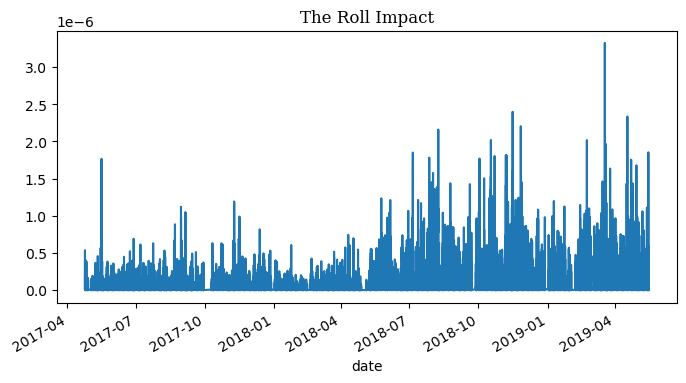

In [21]:
roll_impact.plot(figsize = (8, 4), grid = False)
plt.title("The Roll Impact", fontsize = 12, fontfamily = 'Serif')

#### 5. Becker Parkinson Volatility Estimator

low, high series를 이용해서 Corwin-Schultz spread를 추정하라. 추정된 spread를 이용해 becker parkinson 변동성 추정량도 추정 가능하다. 스프레드가 벌어질수록 변동성이 커진다는 것은 어떻게 해석할 수 있을까?

In [23]:
spread = ms.CorwinSchultz(high = stock.high, low = stock.low)

In [24]:
cs_estimator = spread.corwin_schultz_estimator(window = 20)
cs_estimator.dropna().head()

date
2017-04-24 09:22:00    0.000297
2017-04-24 09:23:00    0.001473
2017-04-24 09:24:00    0.000297
2017-04-24 09:25:00    0.001430
2017-04-24 09:26:00    0.001385
Name: Spread, dtype: float64

Text(0.5, 1.0, 'Corwin Schultz Spread Estimator')

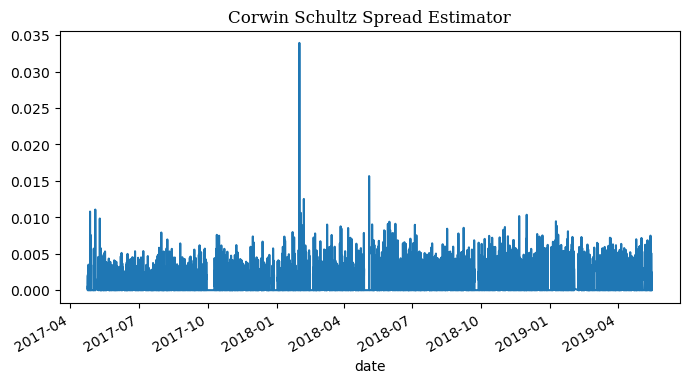

In [25]:
cs_estimator.dropna().plot(grid = False, figsize = (8, 4))
plt.title("Corwin Schultz Spread Estimator", fontsize = 12, fontfamily = 'Serif')

In [26]:
bp_vol = spread.becker_parkinson_vol(window = 20)
bp_vol.dropna().head()

date
2017-04-24 09:22:00    0.000516
2017-04-24 09:23:00    0.000000
2017-04-24 09:24:00    0.000516
2017-04-24 09:25:00    0.000000
2017-04-24 09:26:00    0.000000
dtype: float64

Text(0.5, 1.0, 'Becker Parkinson Volatility Estimator')

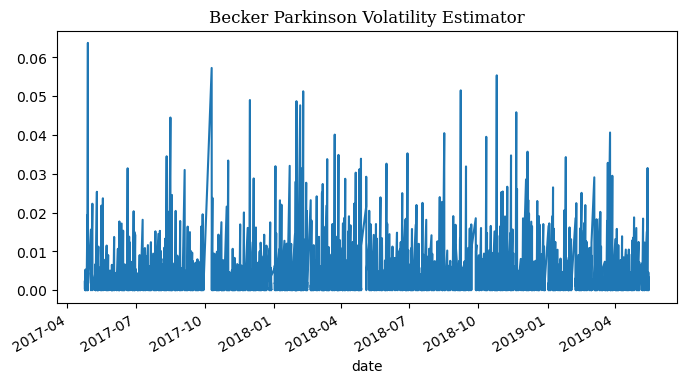

In [28]:
bp_vol.dropna().plot(grid = False, figsize = (8, 4))
plt.title("Becker Parkinson Volatility Estimator", fontsize = 12, fontfamily = 'Serif')

#### 6. Kalman Filtering and GARCH Models

Becker Parkinson Volatility Estimator를 Kalman Filtering하여 적합화하면 $\mathrm{GARCH}$ 변동성 추정치와 비슷해진다. 8주차와 9주차에서 Kalman filtering과 GARCH 모형을 가져와 두 추정치를 비교하라. 여기서 Kalman Filtering은 Becker Parkinson 변동성 추정치에 적용하고, GARCH 모형은 일별 가격 계열에 대해 적용한다

두 추정치는 비슷한 양상을 띄고 있는가? Becker Parkinson 변동성 추정치는 고빈도 데이터에서의 변동성 추정량으로써 설득력이 있는가?

In [ ]:
# Write your code here

#### 7. Bar Sampling

Samsung Electronics High Frequency Data에 대해서 다음을 추정하라

**7.1 Tick Bar Sampling**

주어진 데이터에 대해 Tick count Sampling을 진행하라. 여기서 Tick의 `threshold = 150`이다

In [ ]:
# Write your code here

**7.2 Volume Bar Sampling**

주어진 데이터에 대해서 Volume count Sampling을 진행하라. 여기서 Volume의 `threshold = 1000000`이다

In [35]:
# Write your code here

**7.3 Dollar Value Bar Sampling**

주어진 데이터에 대해서 Dollar Value count Sampling을 진행하라. 여기서 Dollar Value의 `threshold = 10e9`이다

In [ ]:
# Write your code here

**7.4 Sample Distribution**

Time, Tick, Volume, Dollar로 표본추출된 샘플에 대해서 Histogram을 plotting하라. 어느 추출법을 통해 얻은 sample bar가 Normal Distribution에 가깝게 추출되었는가?

In [ ]:
# Write your code here